In [ ]:
from typing import Tuple
import torch

In [ ]:
def sgd_factorise(A: torch.Tensor, rank: int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
  m,n = A.shape
  u_hat = torch.rand(m, rank)
  v_hat = torch.rand(n, rank)
  err = torch.rand(num_epochs)
  for epoch in range(num_epochs):
    for r in range(m):
      for c in range(n):
        e = A[r][c] - u_hat[r] @ v_hat[c].T
        u_hat[r] = u_hat[r] + lr * e * v_hat[c]
        v_hat[c] = v_hat[c] + lr * e * u_hat[r]
    err[epoch] = e
  return (u_hat, v_hat, err)

In [ ]:
A = torch.tensor(
    [[0.3374, 0.6005, 0.1735],
     [3.3359, 0.0492, 1.8374],
     [2.9407, 0.5301, 2.2620]]
)

In [ ]:
u, v, loss = sgd_factorise(A, rank=2)

Text(0.5, 1.0, 'Reconstruction Error')

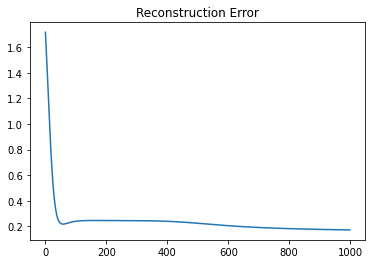

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(loss)
ax.set_title('Reconstruction Error')

In [ ]:
inp = u@v.T
my_loss = torch.nn.functional.mse_loss(input=inp, target=A, reduction='sum')
my_loss

tensor(0.1222)

In [ ]:
U, S, V = torch.svd(A)
S[2] = 0

A_approx = U @ torch.diag(S) @ V.T
torch_loss = torch.nn.functional.mse_loss(A, A_approx, reduction='sum')

In [ ]:
torch.norm(my_loss - torch_loss)

tensor(0.0003)

In [ ]:
def sgd_factorise_masked(A: torch.tensor, M: torch.tensor, rank: int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
  m,n = A.shape
  u_hat = torch.rand(m, rank)
  v_hat = torch.rand(n, rank)
  for epoch in range(num_epochs):
    for r in range(m):
      for c in range(n):
        if M[r,c] == 1:
          e = A[r][c] - u_hat[r] @ v_hat[c].T
          u_hat[r] = u_hat[r] + lr * e * v_hat[c]
          v_hat[c] = v_hat[c] + lr * e * u_hat[r]
  return u_hat, v_hat

In [ ]:
A = torch.tensor(
    [[0.3374, 0.6005, 0.1735],
     [0, 0.0492, 1.8374],
     [2.9407, 0, 2.2620]]
)
M = torch.tensor(
    [[1,1,1],
     [0,1,1],
     [1,0,1]]
)

U, V = sgd_factorise_masked(A, M, 2)
print('U @ V.T:\n', U@V.T)
LOS = torch.nn.functional.mse_loss(input=U@V.T, target=A, reduction='sum')
print('LOS:', LOS)

U @ V.T:
 tensor([[0.3178, 0.0193, 0.2389],
        [2.3164, 0.1244, 1.8325],
        [2.9430, 0.1704, 2.2590]])
LOS: tensor(5.7431)
